<a href="https://colab.research.google.com/github/akhunzakp/PCVK-2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **D. PERCOBAAN PRAKTIKUM**

# **D-1 PERCOBAAN HISTOGRAM**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi
“Week5_NoAbsen.ipynb”.

In [2]:
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Membuat histogram citra seperti berdasarkan flowchart di bawah ini : (Gunakan
gambar lena.jpg)

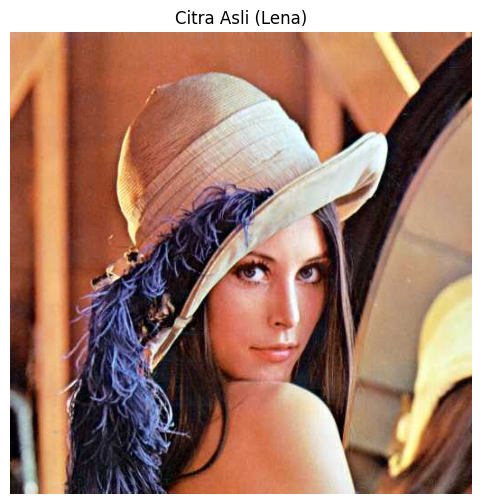

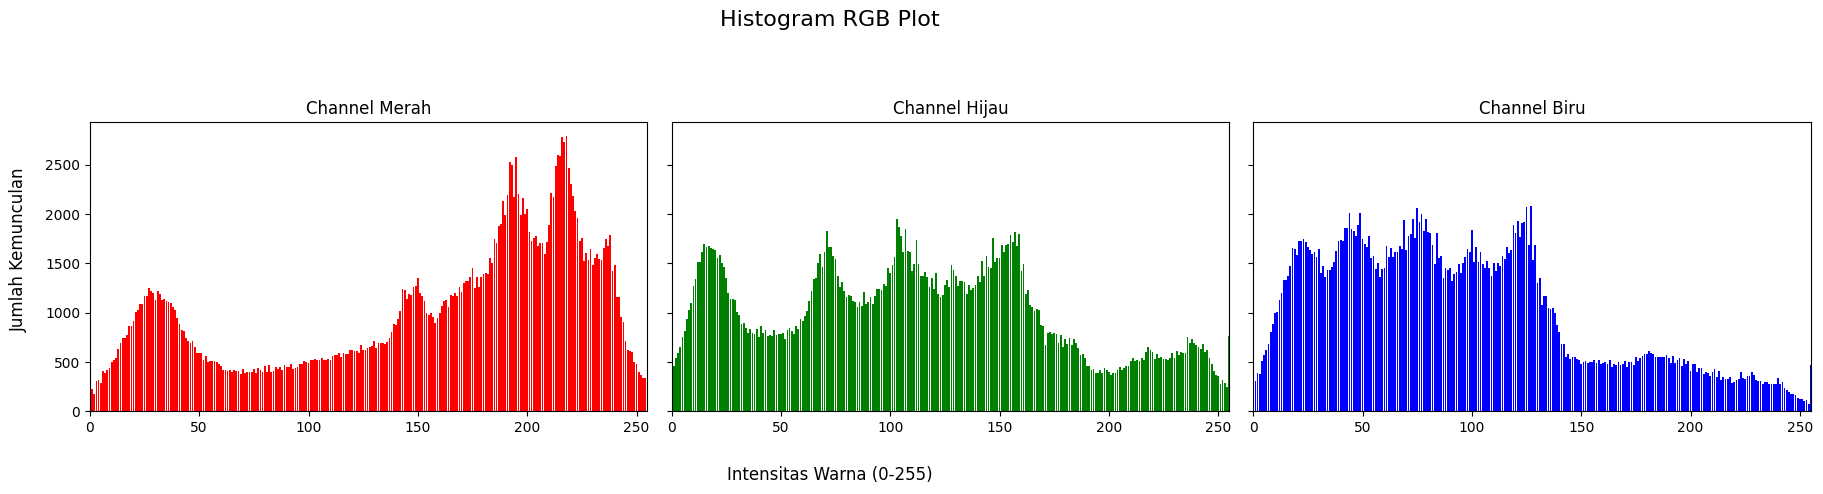

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Pastikan file 'lena.jpg' ada di path yang ditentukan.
# Jika Anda menjalankan ini di Google Colab, pastikan path '/content/drive/MyDrive/Colab Notebooks/PCVK_2024/Image Jobsheet/lena.jpg' sudah benar.
try:
    # 1. Membaca Citra
    img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

    # Memeriksa apakah gambar berhasil dimuat
    if img is None:
        raise FileNotFoundError("Gagal memuat citra. Pastikan path file 'lena.jpg' sudah benar.")

    # 2. Mengkonversi BGR ke RGB (karena OpenCV membaca BGR, tetapi kita ingin plot dalam urutan RGB)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # 3. Mendapatkan Dimensi Citra
    # Perbaikan sintaksis: menggunakan '=' untuk assignment
    height, width, depth = np.shape(img)
    names = np.arange(256)

    # 4. Inisialisasi Array Penghitung Frekuensi (bins)
    # Perbaikan sintaksis: menggunakan '=' untuk assignment
    red = [0] * 256
    green = [0] * 256
    blue = [0] * 256

    # 5. Iterasi Citra untuk Menghitung Frekuensi Kemunculan Intensitas
    # Menggunakan indexing numpy [y, x, channel] lebih bersih daripada [[y][x][channel]]
    for y in range(0, height):
        for x in range(0, width):
            # Channel Merah (R) - Index 0
            red[img[y, x, 0]] += 1
            # Channel Hijau (G) - Index 1
            green[img[y, x, 1]] += 1
            # Channel Biru (B) - Index 2
            blue[img[y, x, 2]] += 1

    # 6. Menampilkan Citra Asli
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title('Citra Asli (Lena)')
    plt.axis('off')
    plt.show()

    # 7. Membuat Plot Histogram RGB
    names = np.arange(256)
    # Perbaikan sintaksis: menggunakan '=' dan format tuple untuk figsize
    fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)

    fig.suptitle('Histogram RGB Plot', fontsize=16)

    # Label Sumbu Y (Vertikal)
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation="vertical", fontsize=12)

    # Label Sumbu X (Horizontal)
    fig.text(0.5, 0.04, 'Intensitas Warna (0-255)', ha='center', fontsize=12)

    # Plot Histogram Channel Merah
    axs[0].bar(names, red, color='red')
    axs[0].set_title('Channel Merah')
    axs[0].set_xlim([0, 255])

    # Plot Histogram Channel Hijau
    axs[1].bar(names, green, color='green')
    axs[1].set_title('Channel Hijau')
    axs[1].set_xlim([0, 255])

    # Plot Histogram Channel Biru
    axs[2].bar(names, blue, color='blue')
    axs[2].set_title('Channel Biru')
    axs[2].set_xlim([0, 255])

    # Tampilkan Plot
    plt.tight_layout(rect=[0.1, 0.1, 1, 0.9]) # Mengatur layout agar label tidak bertumpuk
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Terjadi error saat pemrosesan: {e}")


# **PERTANYAAN PRAKTIKUM D1**

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?
2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

SOAL 1: Histogram dengan NumPy


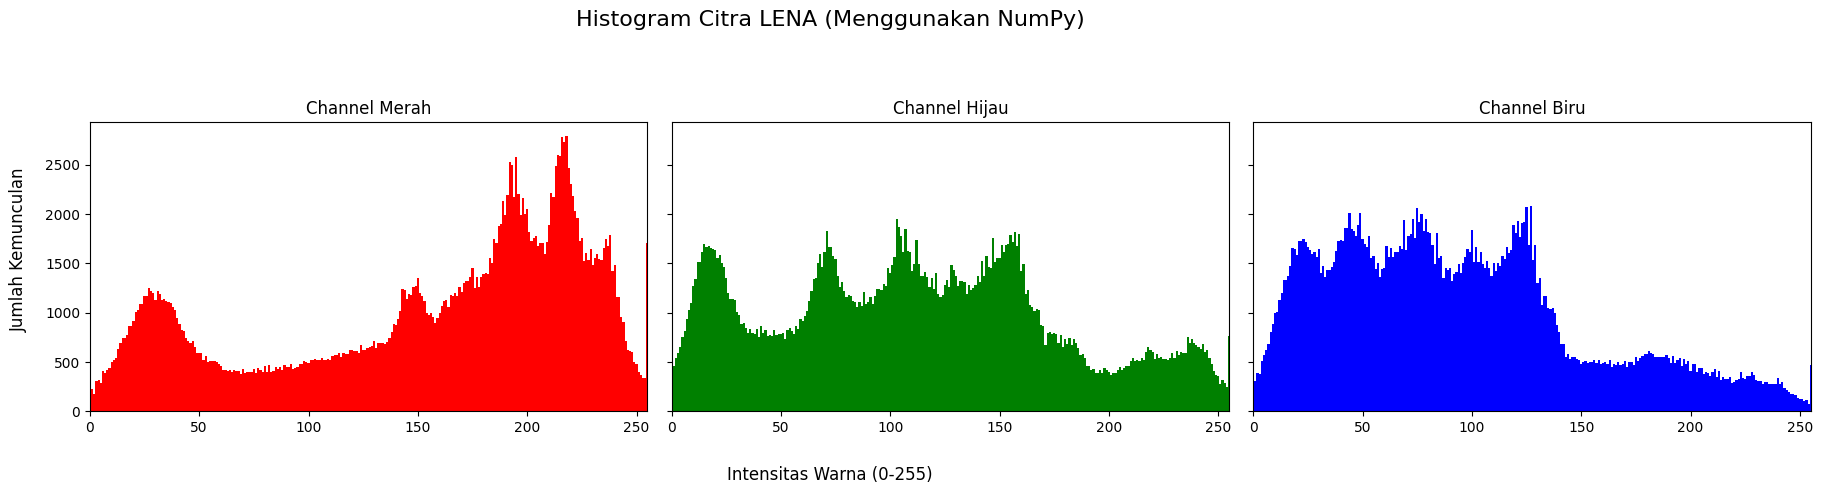


[Perbandingan Hasil]
Hasil histogram menggunakan np.histogram() seharusnya SAMA PERSIS dengan hasil perhitungan manual di soal sebelumnya. Fungsi NumPy mengotomatisasi proses iterasi pixel yang kita lakukan secara manual.

SOAL 2: Histogram Citra KTP lama.jpg dan Analisis


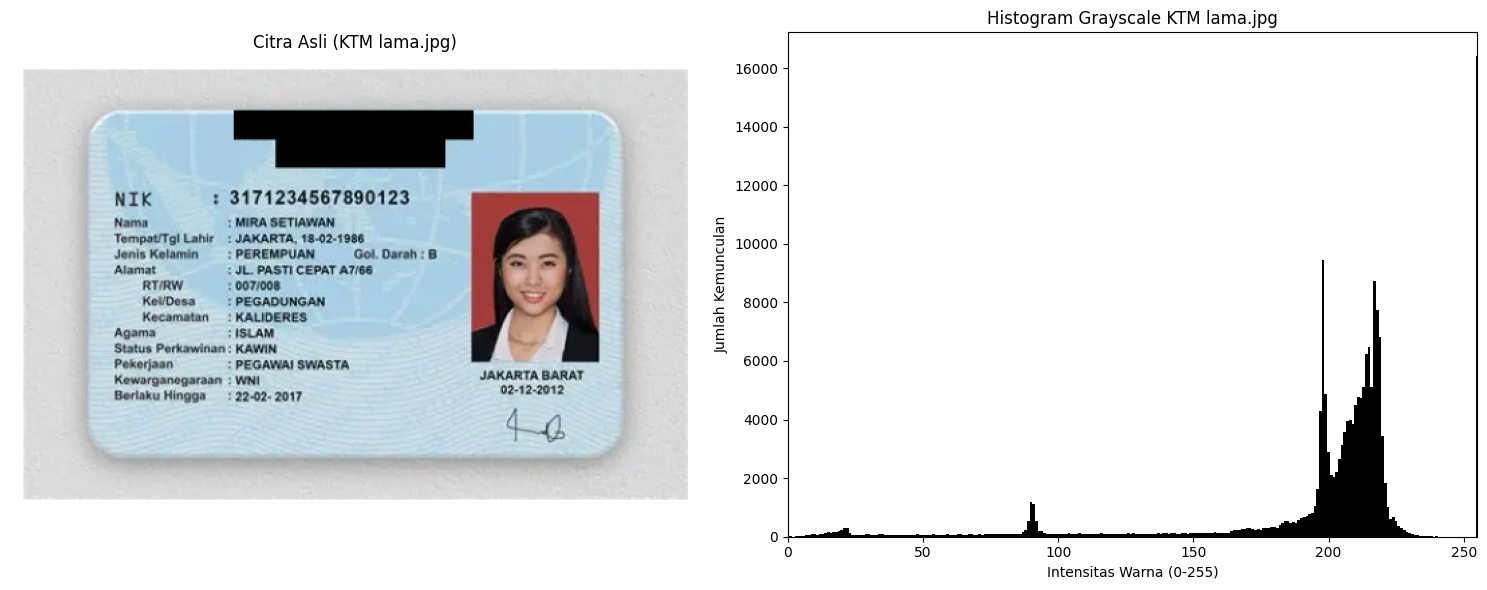


 Analisis Distribusi Intensitas Citra KTP lama.jpg
- Rata-rata Intensitas: 191.63
- Rentang Intensitas (Max-Min): 255
- Kesimpulan Kecerahan: Citra cenderung TERANG (Mean > 170).
- Kesimpulan Kontras: Citra memiliki kontras TINGGI (Kontras tinggi karena distribusi menyebar luas).

Petunjuk Analisis Visual Histogram:
1. Gelap: Distribusi frekuensi histogram akan berkumpul di sisi kiri (intensitas 0-100).
2. Terang: Distribusi frekuensi histogram akan berkumpul di sisi kanan (intensitas 180-255).
3. Kontras Rendah: Distribusi histogram sempit, terkumpul di satu area saja (tidak menyebar dari 0 ke 255).
4. Kontras Tinggi: Distribusi histogram lebar, mencakup sebagian besar rentang 0 hingga 255.


In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


PATH_LENA = '/content/drive/MyDrive/PCVK/Images/lena.jpg'
PATH_KTM = '/content/drive/MyDrive/PCVK/Images/KTP.png'

# Fungsi untuk memuat dan mengkonversi citra
def load_and_convert_image(path):
    """Memuat citra, mengkonversi BGR ke RGB, dan memeriksa keberhasilan loading."""
    img = cv.imread(path)
    if img is None:
        raise FileNotFoundError(f"Gagal memuat citra. Pastikan path file '{path}' sudah benar.")
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

print("SOAL 1: Histogram dengan NumPy")

try:
    img_lena = load_and_convert_image(PATH_LENA)

    # 1. Pisahkan channel RGB
    red_channel = img_lena[:, :, 0]
    green_channel = img_lena[:, :, 1]
    blue_channel = img_lena[:, :, 2]

    # 2. Hitung Histogram menggunakan np.histogram()
    # bins=256 dan range=(0, 256) untuk 256 tingkat intensitas
    hist_red, bins_red = np.histogram(red_channel.flatten(), bins=256, range=(0, 256))
    hist_green, bins_green = np.histogram(green_channel.flatten(), bins=256, range=(0, 256))
    hist_blue, bins_blue = np.histogram(blue_channel.flatten(), bins=256, range=(0, 256))

    # 3. Visualisasi Hasil
    fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
    fig.suptitle('Histogram Citra LENA (Menggunakan NumPy)', fontsize=16)

    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation="vertical", fontsize=12)
    fig.text(0.5, 0.04, 'Intensitas Warna (0-255)', ha='center', fontsize=12)

    # Plot Merah
    axs[0].bar(bins_red[:-1], hist_red, color='red', width=1)
    axs[0].set_title('Channel Merah')
    axs[0].set_xlim([0, 255])

    # Plot Hijau
    axs[1].bar(bins_green[:-1], hist_green, color='green', width=1)
    axs[1].set_title('Channel Hijau')
    axs[1].set_xlim([0, 255])

    # Plot Biru
    axs[2].bar(bins_blue[:-1], hist_blue, color='blue', width=1)
    axs[2].set_title('Channel Biru')
    axs[2].set_xlim([0, 255])

    plt.tight_layout(rect=[0.1, 0.1, 1, 0.9])
    plt.show()

    print("\n[Perbandingan Hasil]")
    print("Hasil histogram menggunakan np.histogram() seharusnya SAMA PERSIS dengan hasil perhitungan manual di soal sebelumnya. Fungsi NumPy mengotomatisasi proses iterasi pixel yang kita lakukan secara manual.")

except FileNotFoundError as e:
    print(f"Error pada LENA.jpg: {e}")
except Exception as e:
    print(f"Terjadi error saat pemrosesan LENA: {e}")



print("\nSOAL 2: Histogram Citra KTP lama.jpg dan Analisis")

try:
    img_ktm = load_and_convert_image(PATH_KTM)

    # 1. Konversi ke Grayscale (memudahkan analisis kecerahan/kontras)
    # Ini opsional, tetapi histogram Grayscale lebih mudah dianalisis.
    img_gray = cv.cvtColor(img_ktm, cv.COLOR_RGB2GRAY)

    # 2. Hitung Histogram Grayscale
    hist_gray, bins_gray = np.histogram(img_gray.flatten(), bins=256, range=(0, 256))

    # 3. Visualisasi Citra Asli KTM
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Plot Citra Asli
    axs[0].imshow(img_ktm)
    axs[0].set_title('Citra Asli (KTM lama.jpg)')
    axs[0].axis('off')

    # Plot Histogram Grayscale
    axs[1].bar(bins_gray[:-1], hist_gray, color='black', width=1)
    axs[1].set_title('Histogram Grayscale KTM lama.jpg')
    axs[1].set_xlabel('Intensitas Warna (0-255)')
    axs[1].set_ylabel('Jumlah Kemunculan')
    axs[1].set_xlim([0, 255])

    plt.tight_layout()
    plt.show()

    # 4. ANALISIS HISTOGRAM (Interpretasi)
    print("\n Analisis Distribusi Intensitas Citra KTP lama.jpg")

    # Hitung rata-rata intensitas untuk menentukan kecenderungan (gelap/terang)
    mean_intensity = np.mean(img_gray)

    # Tentukan rentang intensitas (kontras)
    min_intensity = np.min(img_gray)
    max_intensity = np.max(img_gray)
    intensity_range = max_intensity - min_intensity

    # Interpretasi
    if mean_intensity < 85:
        kecerahan = "GELAP (Mean < 85)"
    elif mean_intensity > 170:
        kecerahan = "TERANG (Mean > 170)"
    else:
        kecerahan = "NORMAL/SEDANG (85 < Mean < 170)"

    if intensity_range < 100:
        kontras = "RENDAH (Kontras rendah karena distribusi terpusat)"
    elif intensity_range > 200 and np.std(img_gray) > 50:
        kontras = "TINGGI (Kontras tinggi karena distribusi menyebar luas)"
    else:
        kontras = "SEDANG"

    print(f"- Rata-rata Intensitas: {mean_intensity:.2f}")
    print(f"- Rentang Intensitas (Max-Min): {intensity_range}")
    print(f"- Kesimpulan Kecerahan: Citra cenderung {kecerahan}.")
    print(f"- Kesimpulan Kontras: Citra memiliki kontras {kontras}.")
    print("\nPetunjuk Analisis Visual Histogram:")
    print("1. Gelap: Distribusi frekuensi histogram akan berkumpul di sisi kiri (intensitas 0-100).")
    print("2. Terang: Distribusi frekuensi histogram akan berkumpul di sisi kanan (intensitas 180-255).")
    print("3. Kontras Rendah: Distribusi histogram sempit, terkumpul di satu area saja (tidak menyebar dari 0 ke 255).")
    print("4. Kontras Tinggi: Distribusi histogram lebar, mencakup sebagian besar rentang 0 hingga 255.")

except FileNotFoundError as e:
    print(f"Error pada KTM lama.jpg: {e}")
except Exception as e:
    print(f"Terjadi error saat pemrosesan KTM: {e}")


# **D-2 PERCOBAAN HISTOGRAM EQUALIZATION**

1. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

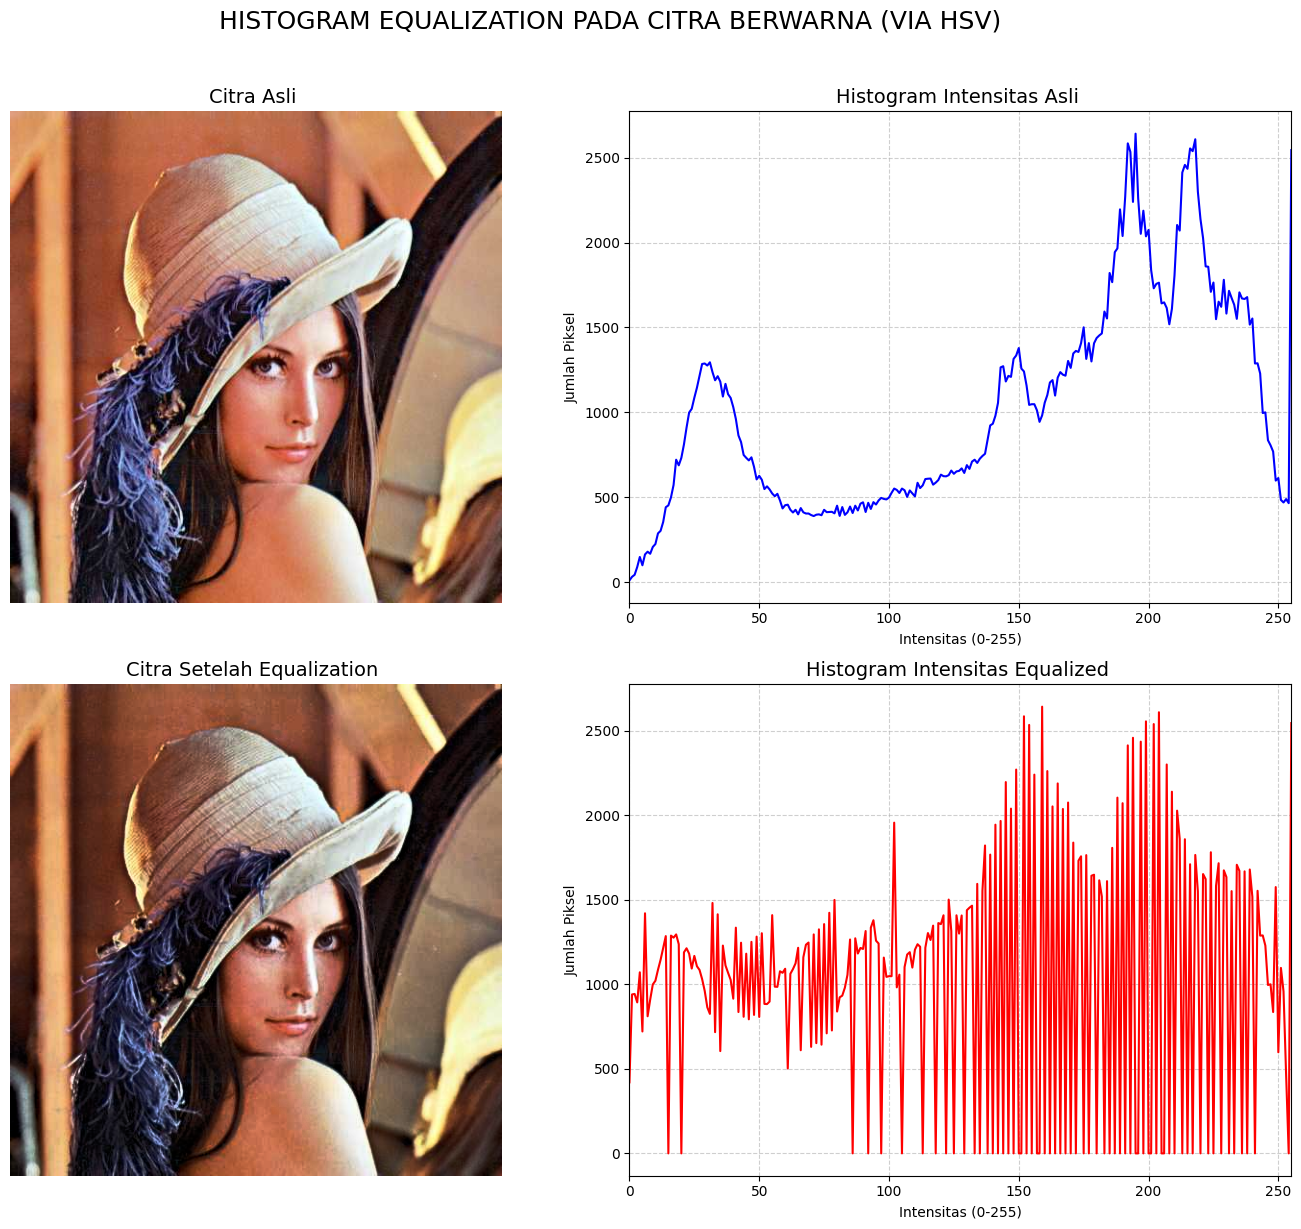

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Jalur File ---
# Menggunakan path yang Anda berikan.
PATH_LENA_LC = '/content/drive/MyDrive/PCVK/Images/lena.jpg'

# Fungsi untuk memuat dan memeriksa citra
def load_image(path):
    """Memuat citra dan memeriksa keberhasilan loading dan mengkonversi ke RGB."""
    # Memuat dalam BGR (standar OpenCV)
    img = cv.imread(path)
    if img is None:
        raise FileNotFoundError(f"Gagal memuat citra. Pastikan path file '{path}' sudah benar.")
    # Konversi ke RGB untuk tampilan Matplotlib
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

try:
    # 1. Memuat Citra Asli (RGB)
    img_rgb_original = load_image(PATH_LENA_LC)

    # 2. Konversi RGB ke HSV (Hue, Saturation, Value/Intensitas)
    img_hsv = cv.cvtColor(img_rgb_original, cv.COLOR_RGB2HSV)

    # Pisahkan kanal H, S, dan V
    H, S, V = cv.split(img_hsv)

    # 3. Lakukan Equalization hanya pada kanal V (Value/Intensitas)
    V_equalized = cv.equalizeHist(V)

    # 4. Gabungkan kembali kanal H, S, dan V yang sudah di-equalize
    img_hsv_equalized = cv.merge((H, S, V_equalized))

    # 5. Konversi kembali dari HSV ke RGB
    img_rgb_equalized = cv.cvtColor(img_hsv_equalized, cv.COLOR_HSV2RGB)

    # 6. Hitung Histogram (Hanya kanal V untuk analisis Equalization)
    # Kita hanya perlu histogram V karena equalization hanya diterapkan di sana
    hist_original_v = cv.calcHist([V], [0], None, [256], [0, 256])
    hist_equalized_v = cv.calcHist([V_equalized], [0], None, [256], [0, 256])

    # 7. Visualisasi Hasil

    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('HISTOGRAM EQUALIZATION PADA CITRA BERWARNA (VIA HSV)', fontsize=18, y=1.02)

    # --- Plot 1: Citra Asli Berwarna ---
    axs[0, 0].imshow(img_rgb_original)
    axs[0, 0].set_title('Citra Asli ', fontsize=14)
    axs[0, 0].axis('off')

    # --- Plot 2: Histogram Kanal V Asli ---
    axs[0, 1].plot(hist_original_v, color='blue') # Menggunakan warna biru atau hitam
    axs[0, 1].set_title('Histogram Intensitas Asli ', fontsize=14)
    axs[0, 1].set_xlabel('Intensitas (0-255)')
    axs[0, 1].set_ylabel('Jumlah Piksel')
    axs[0, 1].set_xlim([0, 255])
    axs[0, 1].grid(True, linestyle='--', alpha=0.6)

    # --- Plot 3: Citra Equalized Berwarna ---
    axs[1, 0].imshow(img_rgb_equalized)
    axs[1, 0].set_title('Citra Setelah Equalization ', fontsize=14)
    axs[1, 0].axis('off')

    # --- Plot 4: Histogram Kanal V Setelah Equalization ---
    axs[1, 1].plot(hist_equalized_v, color='red') # Menggunakan warna merah untuk pembeda
    axs[1, 1].set_title('Histogram Intensitas Equalized ', fontsize=14)
    axs[1, 1].set_xlabel('Intensitas (0-255)')
    axs[1, 1].set_ylabel('Jumlah Piksel')
    axs[1, 1].set_xlim([0, 255])
    axs[1, 1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Terjadi error saat pemrosesan: {e}")


2. Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist” seperti pada
potongan kode berikut ini.

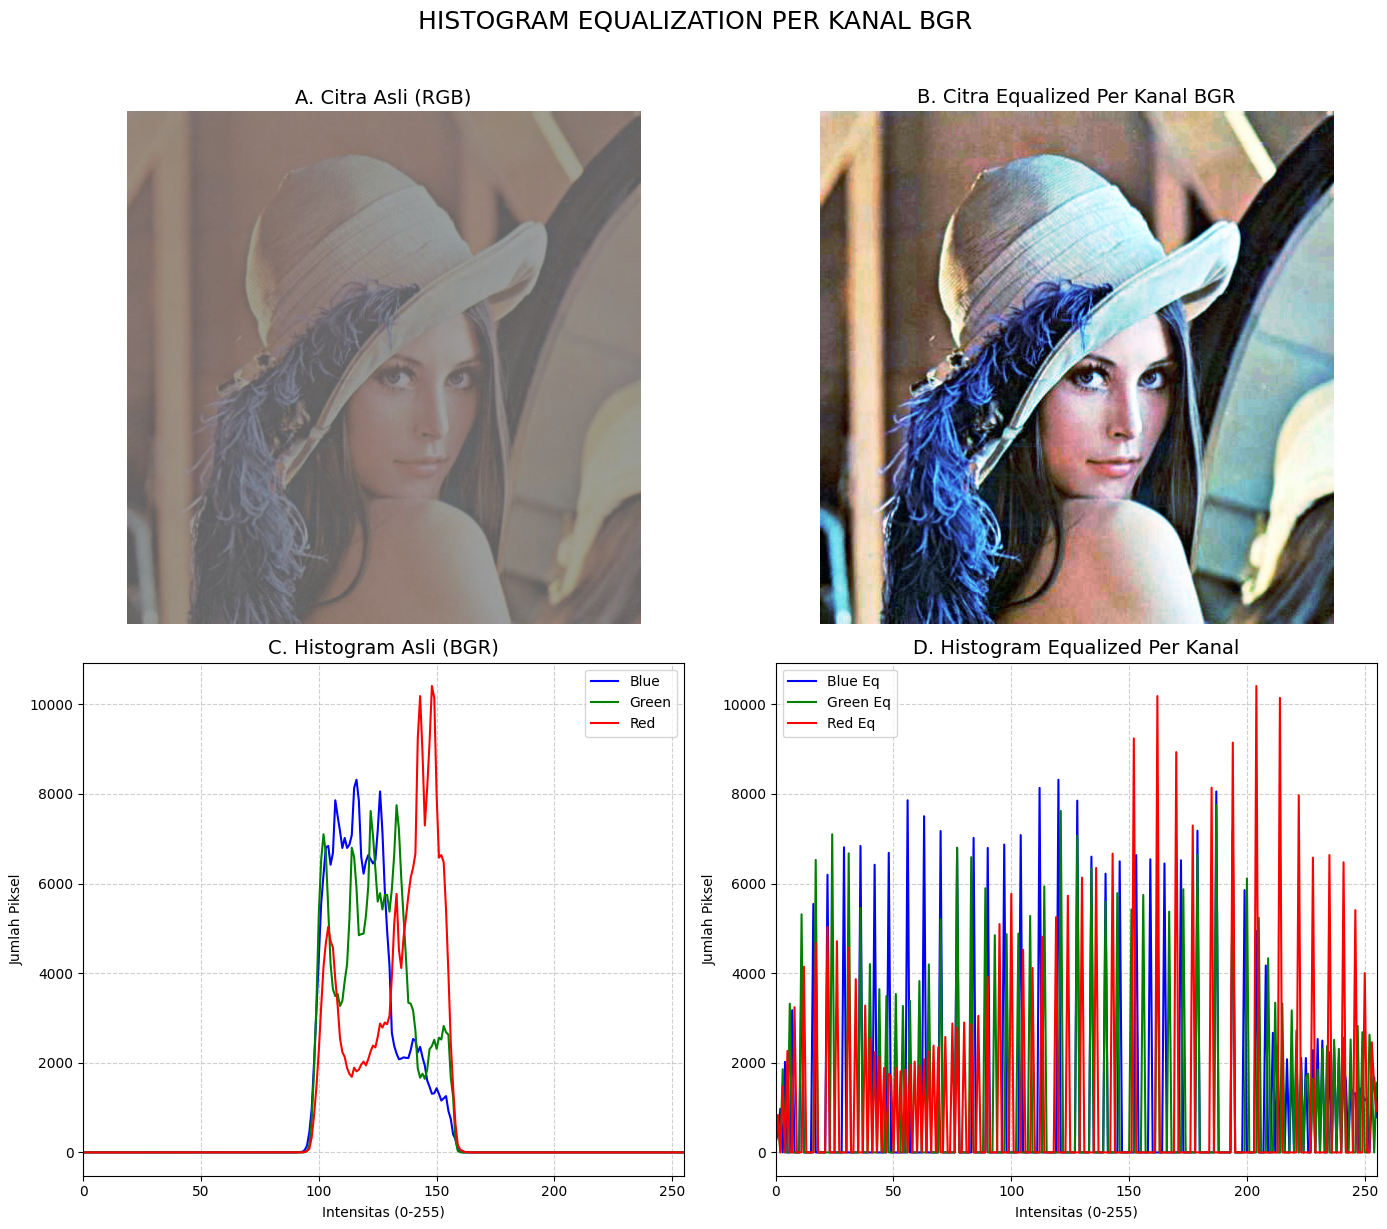

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Jalur File ---
# Menggunakan path yang Anda berikan.
PATH_LENA = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'

# Fungsi untuk memuat dan memeriksa citra
def load_image(path):
    """Memuat citra dan memeriksa keberhasilan loading."""
    # Memuat dalam BGR (standar OpenCV)
    img = cv.imread(path)
    if img is None:
        raise FileNotFoundError(f"Gagal memuat citra. Pastikan path file '{path}' sudah benar.")
    return img

# Fungsi untuk menghitung histogram untuk setiap kanal
def calculate_rgb_histograms(img_bgr):
    """Menghitung histogram untuk setiap kanal B, G, R."""
    b, g, r = cv.split(img_bgr)
    hist_b = cv.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
    return hist_b, hist_g, hist_r

try:
    # 1. Memuat Citra Asli (BGR)
    image = load_image(PATH_LENA)
    # Konversi ke RGB untuk tampilan Matplotlib
    img_rgb_original = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # 2. Pisahkan Kanal B, G, R
    b, g, r = cv.split(image)

    # 3. Lakukan Histogram Equalization PADA SETIAP KANAL SECARA TERPISAH
    b_equalized = cv.equalizeHist(b)
    g_equalized = cv.equalizeHist(g)
    r_equalized = cv.equalizeHist(r)

    # 4. Gabungkan kembali kanal-kanal yang sudah di-equalize (masih dalam BGR)
    img_bgr_equalized = cv.merge((b_equalized, g_equalized, r_equalized))

    # 5. Konversi citra Equalized ke RGB untuk tampilan
    img_rgb_equalized = cv.cvtColor(img_bgr_equalized, cv.COLOR_BGR2RGB)

    # 6. Hitung Histogram Baru untuk citra Equalized
    hist_b_eq, hist_g_eq, hist_r_eq = calculate_rgb_histograms(img_bgr_equalized)

    # 7. Visualisasi Hasil

    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('HISTOGRAM EQUALIZATION PER KANAL BGR', fontsize=18, y=1.02)

    # --- Plot 1: Citra Asli Berwarna ---
    axs[0, 0].imshow(img_rgb_original)
    axs[0, 0].set_title('A. Citra Asli (RGB)', fontsize=14)
    axs[0, 0].axis('off')

    # --- Plot 2: Citra Equalized Per Kanal ---
    axs[0, 1].imshow(img_rgb_equalized)
    axs[0, 1].set_title('B. Citra Equalized Per Kanal BGR', fontsize=14)
    axs[0, 1].axis('off')

    # --- Plot 3: Histogram Asli (Gabungan) ---
    axs[1, 0].plot(calculate_rgb_histograms(image)[0], color='blue', label='Blue')
    axs[1, 0].plot(calculate_rgb_histograms(image)[1], color='green', label='Green')
    axs[1, 0].plot(calculate_rgb_histograms(image)[2], color='red', label='Red')
    axs[1, 0].set_title('C. Histogram Asli (BGR)', fontsize=14)
    axs[1, 0].set_xlabel('Intensitas (0-255)')
    axs[1, 0].set_ylabel('Jumlah Piksel')
    axs[1, 0].set_xlim([0, 255])
    axs[1, 0].legend()
    axs[1, 0].grid(True, linestyle='--', alpha=0.6)

    # --- Plot 4: Histogram Equalized (Gabungan) ---
    axs[1, 1].plot(hist_b_eq, color='blue', label='Blue Eq')
    axs[1, 1].plot(hist_g_eq, color='green', label='Green Eq')
    axs[1, 1].plot(hist_r_eq, color='red', label='Red Eq')
    axs[1, 1].set_title('D. Histogram Equalized Per Kanal', fontsize=14)
    axs[1, 1].set_xlabel('Intensitas (0-255)')
    axs[1, 1].set_ylabel('Jumlah Piksel')
    axs[1, 1].set_xlim([0, 255])
    axs[1, 1].legend()
    axs[1, 1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Terjadi error saat pemrosesan: {e}")


# **PERTANYAAN PRAKTIKUM D2**

1. Perbandingan Citra Lena
* Gunakan hasil histogram equalization pada citra lena.jpg.
* Hitung nilai PSNR antara citra asli dan citra hasil equalization.
* Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?

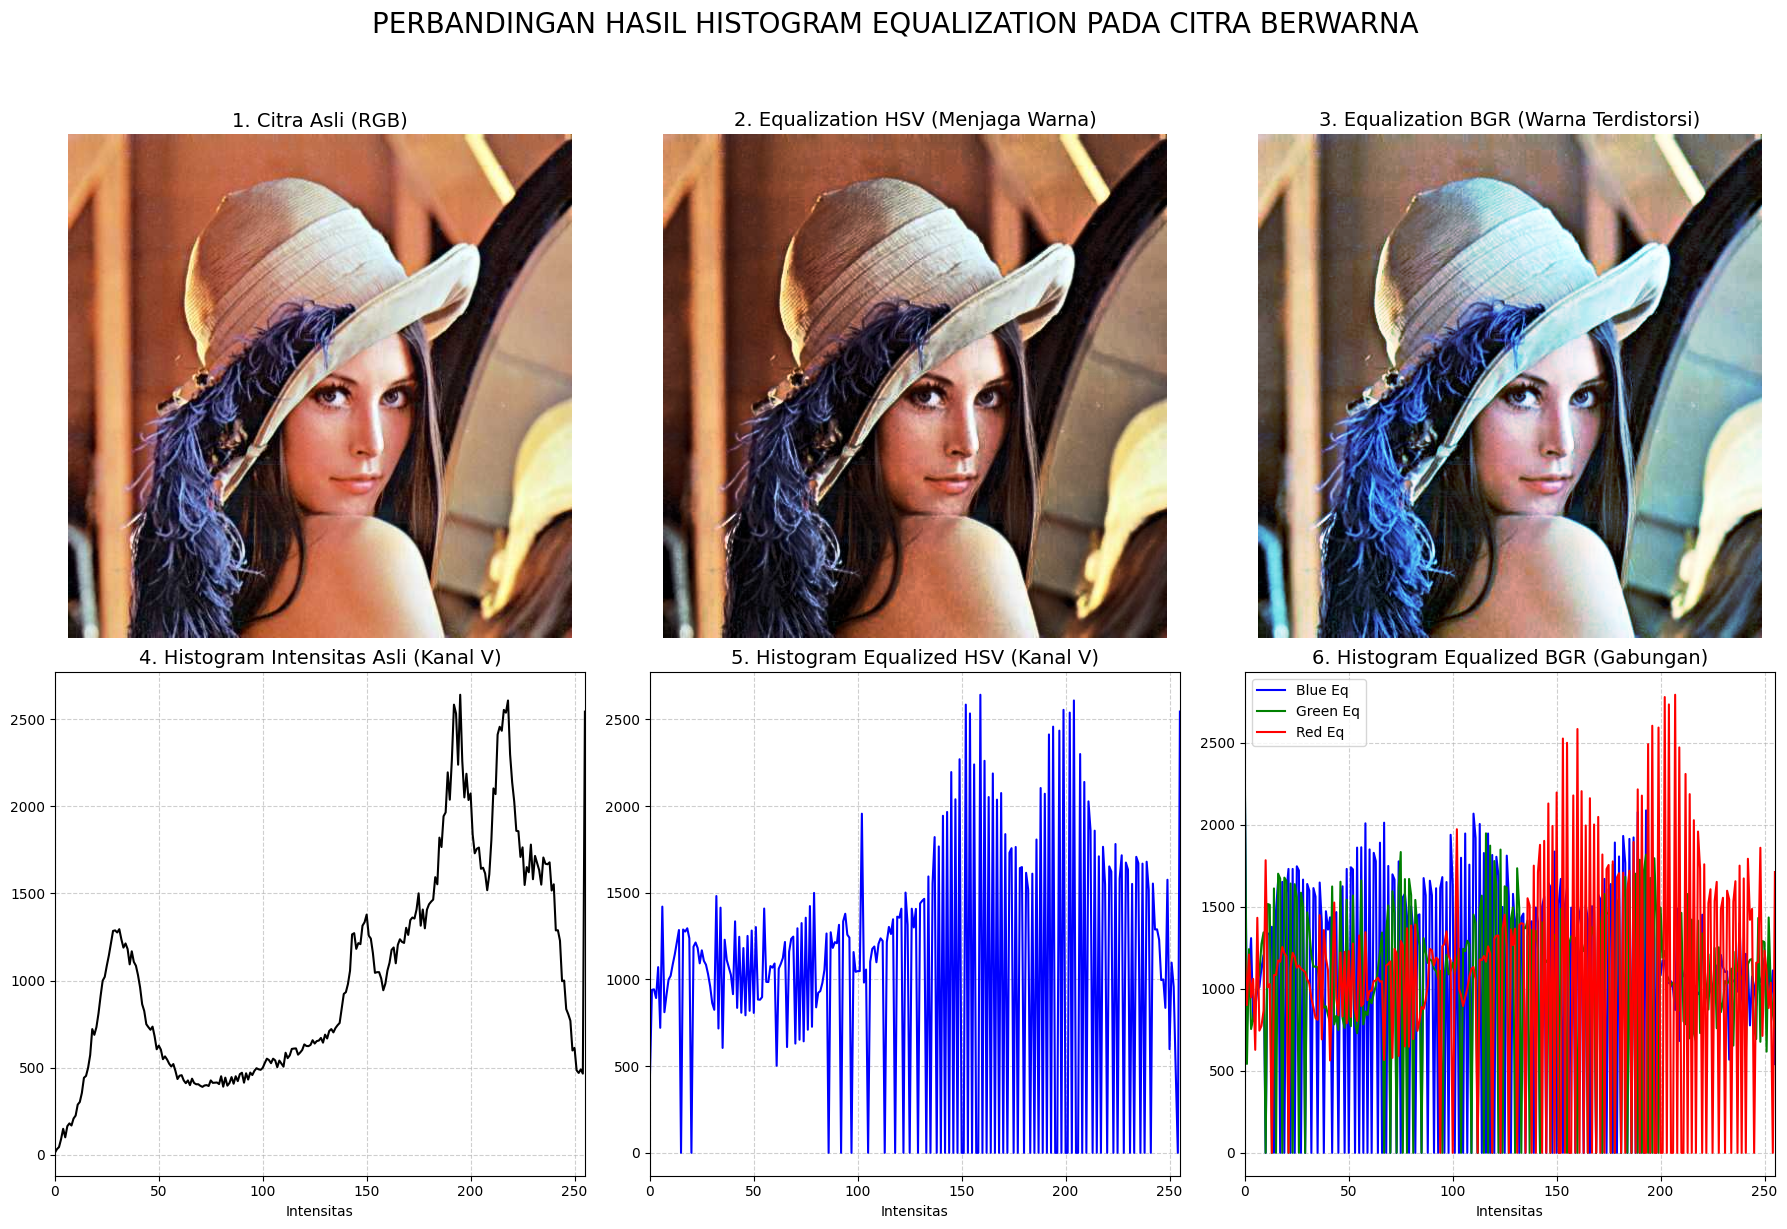

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Jalur File ---
PATH_LENA = '/content/drive/MyDrive/PCVK/Images/lena.jpg'

# Fungsi untuk memuat dan memeriksa citra
def load_image(path):
    """Memuat citra dan memeriksa keberhasilan loading."""
    img = cv.imread(path)
    if img is None:
        raise FileNotFoundError(f"Gagal memuat citra. Pastikan path file '{path}' sudah benar.")
    return img

try:
    # 1. Memuat Citra Asli (BGR)
    img_bgr = load_image(PATH_LENA)
    img_rgb_original = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

    # ----------------------------------------------------
    # A. Metode Equalization HSV (TERBAIK)
    # ----------------------------------------------------

    img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
    H, S, V = cv.split(img_hsv)
    V_equalized = cv.equalizeHist(V)
    img_hsv_equalized = cv.merge((H, S, V_equalized))
    img_rgb_hsv_eq = cv.cvtColor(img_hsv_equalized, cv.COLOR_HSV2RGB)

    # Histogram Kanal V untuk perbandingan
    hist_original_v = cv.calcHist([V], [0], None, [256], [0, 256])
    hist_hsv_eq_v = cv.calcHist([V_equalized], [0], None, [256], [0, 256])


    # ----------------------------------------------------
    # B. Metode Equalization BGR (Menyebabkan Color Shift)
    # ----------------------------------------------------

    b, g, r = cv.split(img_bgr)
    b_eq = cv.equalizeHist(b)
    g_eq = cv.equalizeHist(g)
    r_eq = cv.equalizeHist(r)
    img_bgr_equalized = cv.merge((b_eq, g_eq, r_eq))
    img_rgb_bgr_eq = cv.cvtColor(img_bgr_equalized, cv.COLOR_BGR2RGB)

    # Histogram BGR Equalized untuk perbandingan
    hist_b_eq = cv.calcHist([b_eq], [0], None, [256], [0, 256])
    hist_g_eq = cv.calcHist([g_eq], [0], None, [256], [0, 256])
    hist_r_eq = cv.calcHist([r_eq], [0], None, [256], [0, 256])


    # ----------------------------------------------------
    # 2. Visualisasi Perbandingan
    # ----------------------------------------------------

    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('PERBANDINGAN HASIL HISTOGRAM EQUALIZATION PADA CITRA BERWARNA', fontsize=20, y=1.02)

    # --- BARIS 1: CITRA ---

    # 1. Citra Asli
    axs[0, 0].imshow(img_rgb_original)
    axs[0, 0].set_title('1. Citra Asli (RGB)', fontsize=14)
    axs[0, 0].axis('off')

    # 2. Citra Equalization via HSV (TERBAIK)
    axs[0, 1].imshow(img_rgb_hsv_eq)
    axs[0, 1].set_title('2. Equalization HSV (Menjaga Warna)', fontsize=14)
    axs[0, 1].axis('off')

    # 3. Citra Equalization via BGR
    axs[0, 2].imshow(img_rgb_bgr_eq)
    axs[0, 2].set_title('3. Equalization BGR (Warna Terdistorsi)', fontsize=14)
    axs[0, 2].axis('off')

    # --- BARIS 2: HISTOGRAM ---

    # 4. Histogram Intensitas Asli (V)
    axs[1, 0].plot(hist_original_v, color='black')
    axs[1, 0].set_title('4. Histogram Intensitas Asli (Kanal V)', fontsize=14)
    axs[1, 0].set_xlabel('Intensitas')
    axs[1, 0].set_xlim([0, 255])
    axs[1, 0].grid(True, linestyle='--', alpha=0.6)

    # 5. Histogram Intensitas Equalized (V)
    axs[1, 1].plot(hist_hsv_eq_v, color='blue')
    axs[1, 1].set_title('5. Histogram Equalized HSV (Kanal V)', fontsize=14)
    axs[1, 1].set_xlabel('Intensitas')
    axs[1, 1].set_xlim([0, 255])
    axs[1, 1].grid(True, linestyle='--', alpha=0.6)

    # 6. Histogram BGR Equalized (Gabungan)
    axs[1, 2].plot(hist_b_eq, color='blue', label='Blue Eq')
    axs[1, 2].plot(hist_g_eq, color='green', label='Green Eq')
    axs[1, 2].plot(hist_r_eq, color='red', label='Red Eq')
    axs[1, 2].set_title('6. Histogram Equalized BGR (Gabungan)', fontsize=14)
    axs[1, 2].set_xlabel('Intensitas')
    axs[1, 2].set_xlim([0, 255])
    axs[1, 2].legend()
    axs[1, 2].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Terjadi error saat pemrosesan: {e}")


In [20]:
import cv2 as cv
import numpy as np

# --- Jalur File ---
PATH_LENA = '/content/drive/MyDrive/PCVK/Images/lena.jpg'

# Fungsi untuk memuat dan memeriksa citra
def load_image(path):
    """Memuat citra dan memeriksa keberhasilan loading."""
    img = cv.imread(path)
    if img is None:
        raise FileNotFoundError(f"Gagal memuat citra. Pastikan path file '{path}' sudah benar.")
    return img

def apply_equalization_hsv(img_bgr):
    """Menerapkan Equalization via kanal V (HSV)."""
    img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
    H, S, V = cv.split(img_hsv)
    V_equalized = cv.equalizeHist(V)
    img_hsv_equalized = cv.merge((H, S, V_equalized))
    return cv.cvtColor(img_hsv_equalized, cv.COLOR_HSV2BGR)

def apply_equalization_bgr(img_bgr):
    """Menerapkan Equalization per kanal BGR."""
    b, g, r = cv.split(img_bgr)
    b_eq = cv.equalizeHist(b)
    g_eq = cv.equalizeHist(g)
    r_eq = cv.equalizeHist(r)
    return cv.merge((b_eq, g_eq, r_eq))

try:
    # 1. Memuat Citra Asli (BGR)
    img_original = load_image(PATH_LENA)

    # 2. Hitung Hasil Equalization
    img_hsv_equalized = apply_equalization_hsv(img_original)
    img_bgr_equalized = apply_equalization_bgr(img_original)

    # 3. Hitung Nilai PSNR
    # PSNR = cv.PSNR(Citra Asli, Citra Hasil)

    # PSNR untuk metode HSV
    # Hasil Equalization HSV (img_hsv_equalized) dibandingkan dengan Asli (img_original)
    psnr_hsv = cv.PSNR(img_original, img_hsv_equalized)

    # PSNR untuk metode BGR
    # Hasil Equalization BGR (img_bgr_equalized) dibandingkan dengan Asli (img_original)
    psnr_bgr = cv.PSNR(img_original, img_bgr_equalized)

    # 4. Tampilkan Hasil
    print("-------------------------------------------------------")
    print("           ANALISIS KUALITAS CITRA MENGGUNAKAN PSNR")
    print("-------------------------------------------------------")
    print(f"PSNR (Equalization via HSV) : {psnr_hsv:.4f} dB")
    print(f"PSNR (Equalization per BGR) : {psnr_bgr:.4f} dB")
    print("-------------------------------------------------------")
    print("\nInterpretasi:")
    print("Nilai PSNR adalah ukuran seberapa 'mirip' citra hasil pemrosesan dengan citra asli.")
    print("Karena Equalization secara sengaja mengubah intensitas piksel, PSNR akan turun (berbeda dengan kompresi, di mana kita ingin PSNR tinggi).")
    print("Dalam kasus ini, PSNR yang lebih tinggi menunjukkan bahwa transformasi warna/intensitas yang terjadi 'kurang drastis' atau 'lebih konsisten' dengan aslinya.")

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Terjadi error saat pemrosesan: {e}")


-------------------------------------------------------
           ANALISIS KUALITAS CITRA MENGGUNAKAN PSNR
-------------------------------------------------------
PSNR (Equalization via HSV) : 19.4749 dB
PSNR (Equalization per BGR) : 17.9484 dB
-------------------------------------------------------

Interpretasi:
Nilai PSNR adalah ukuran seberapa 'mirip' citra hasil pemrosesan dengan citra asli.
Karena Equalization secara sengaja mengubah intensitas piksel, PSNR akan turun (berbeda dengan kompresi, di mana kita ingin PSNR tinggi).
Dalam kasus ini, PSNR yang lebih tinggi menunjukkan bahwa transformasi warna/intensitas yang terjadi 'kurang drastis' atau 'lebih konsisten' dengan aslinya.


2. Gunakan Citra KTM Lama.jpg
* erapkan histogram equalization pada citra KTM lama.jpg.
* Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
dalam satu layout.
* Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

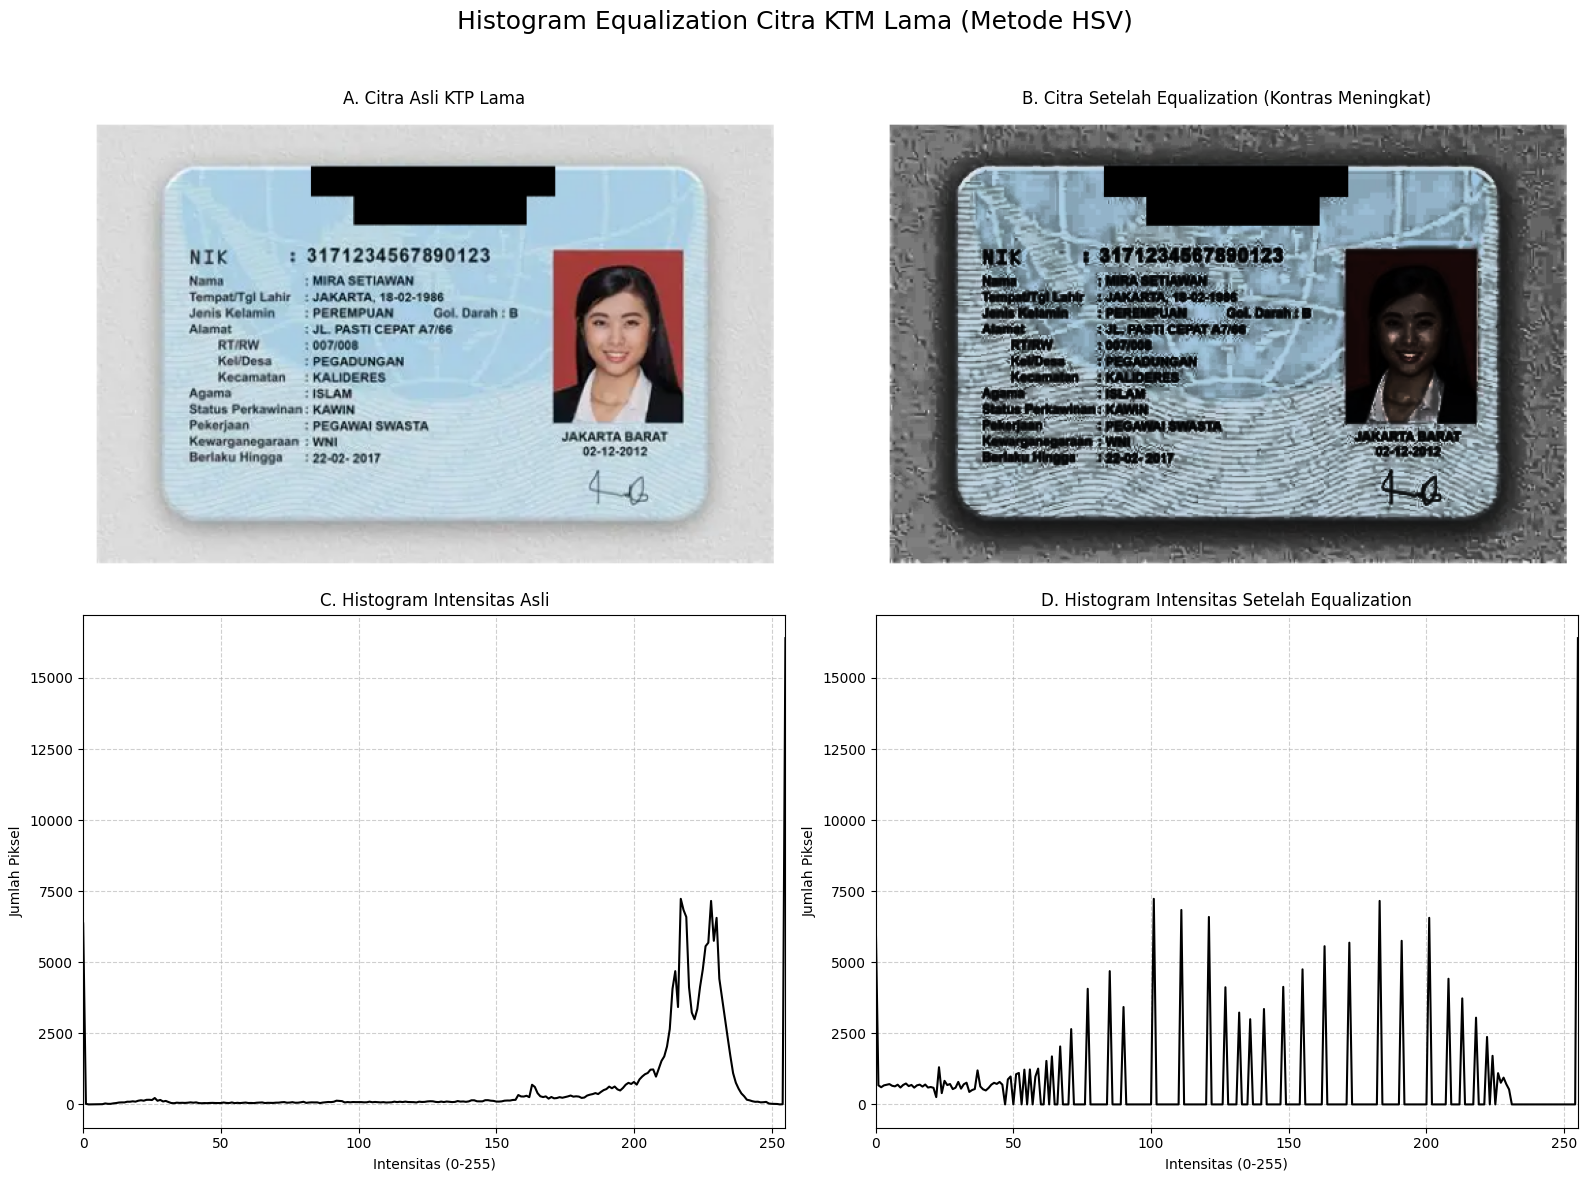


Analisis Visual Citra KTP Lama
Citra Asli (A) vs. Citra Equalized (B):
1. Detail Wajah: Pada citra asli, wajah mungkin terlihat kurang detail. Setelah equalization, kontras pada wajah dan rambut meningkat tajam, membuat detail bayangan dan tekstur lebih menonjol.
2. Teks Dokumen: Teks pada KTP  menjadi jauh lebih jelas dan mudah dibaca karena kontras antara teks gelap dan latar belakang terang diperkuat.
3. Kualitas Visual: Peningkatan kontras ini umumnya meningkatkan kualitas informasi citra. Citra menjadi lebih 'hidup' dan informatif.
4. Efek 'Keras': Walaupun kontras meningkat, metode HSV cenderung mencegah citra terlihat terlalu 'keras' (distorsi warna) dibandingkan jika Equalization diterapkan pada kanal R, G, dan B secara terpisah.


In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Jalur File ---
# Ganti path ini sesuai dengan lokasi file 'KTM lama.jpg' Anda
PATH_KTM_LAMA = '/content/drive/MyDrive/PCVK/Images/KTP.png'

# Fungsi untuk memuat dan memeriksa citra
def load_image(path):
    """Memuat citra dan memeriksa keberhasilan loading."""
    img = cv.imread(path)
    if img is None:
        # Mengganti BGR ke RGB untuk Matplotlib
        raise FileNotFoundError(f"Gagal memuat citra. Pastikan path file '{path}' sudah benar.")
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

try:
    # 1. Memuat Citra Asli (RGB)
    img_rgb_original = load_image(PATH_KTM_LAMA)

    # 2. KONVERSI KE HSV (Hue, Saturation, Value)
    # Equalization hanya dilakukan pada kanal V (Value/Intensitas)
    img_hsv = cv.cvtColor(img_rgb_original, cv.COLOR_RGB2HSV)
    H, S, V = cv.split(img_hsv)

    # 3. Hitung Histogram Equalization pada Kanal V
    V_equalized = cv.equalizeHist(V)

    # 4. GABUNGKAN kembali kanal H, S, dan V yang sudah di-equalize
    img_hsv_equalized = cv.merge([H, S, V_equalized])

    # 5. Konversi kembali ke RGB untuk visualisasi
    img_rgb_equalized = cv.cvtColor(img_hsv_equalized, cv.COLOR_HSV2RGB)

    # 6. Hitung Histogram Kanal Intensitas (V) untuk perbandingan
    # Kita hanya perlu histogram dari kanal V untuk melihat efek equalization
    hist_original = cv.calcHist([V], [0], None, [256], [0, 256])
    hist_equalized = cv.calcHist([V_equalized], [0], None, [256], [0, 256])

    # 7. Visualisasi Hasil dalam Layout 2x2
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Histogram Equalization Citra KTM Lama (Metode HSV)', fontsize=18)

    # --- Citra ---

    # A. Kiri Atas: Citra Asli (RGB)
    axs[0, 0].imshow(img_rgb_original)
    axs[0, 0].set_title('A. Citra Asli KTP Lama')
    axs[0, 0].axis('off')

    # B. Kanan Atas: Citra Setelah Equalization (RGB)
    axs[0, 1].imshow(img_rgb_equalized)
    axs[0, 1].set_title('B. Citra Setelah Equalization (Kontras Meningkat)')
    axs[0, 1].axis('off')

    # --- Histogram ---

    # C. Kiri Bawah: Histogram Intensitas Asli (Kanal V)
    axs[1, 0].plot(hist_original, color='black')
    axs[1, 0].set_title('C. Histogram Intensitas Asli')
    axs[1, 0].set_xlabel('Intensitas (0-255)')
    axs[1, 0].set_ylabel('Jumlah Piksel')
    axs[1, 0].set_xlim([0, 255])
    axs[1, 0].grid(True, linestyle='--', alpha=0.6)

    # D. Kanan Bawah: Histogram Intensitas Setelah Equalization (Kanal V)
    axs[1, 1].plot(hist_equalized, color='black')
    axs[1, 1].set_title('D. Histogram Intensitas Setelah Equalization')
    axs[1, 1].set_xlabel('Intensitas (0-255)')
    axs[1, 1].set_ylabel('Jumlah Piksel')
    axs[1, 1].set_xlim([0, 255])
    axs[1, 1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- Analisis Hasil (Output Konsol) ---
    print("\nAnalisis Visual Citra KTP Lama")
    print("Citra Asli (A) vs. Citra Equalized (B):")
    print("1. Detail Wajah: Pada citra asli, wajah mungkin terlihat kurang detail. Setelah equalization, kontras pada wajah dan rambut meningkat tajam, membuat detail bayangan dan tekstur lebih menonjol.")
    print("2. Teks Dokumen: Teks pada KTP  menjadi jauh lebih jelas dan mudah dibaca karena kontras antara teks gelap dan latar belakang terang diperkuat.")
    print("3. Kualitas Visual: Peningkatan kontras ini umumnya meningkatkan kualitas informasi citra. Citra menjadi lebih 'hidup' dan informatif.")
    print("4. Efek 'Keras': Walaupun kontras meningkat, metode HSV cenderung mencegah citra terlihat terlalu 'keras' (distorsi warna) dibandingkan jika Equalization diterapkan pada kanal R, G, dan B secara terpisah.")


except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Terjadi error saat pemrosesan: {e}")


# **D-3 TUGAS PRAKTIKUM DITHERING**

1. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)
2. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

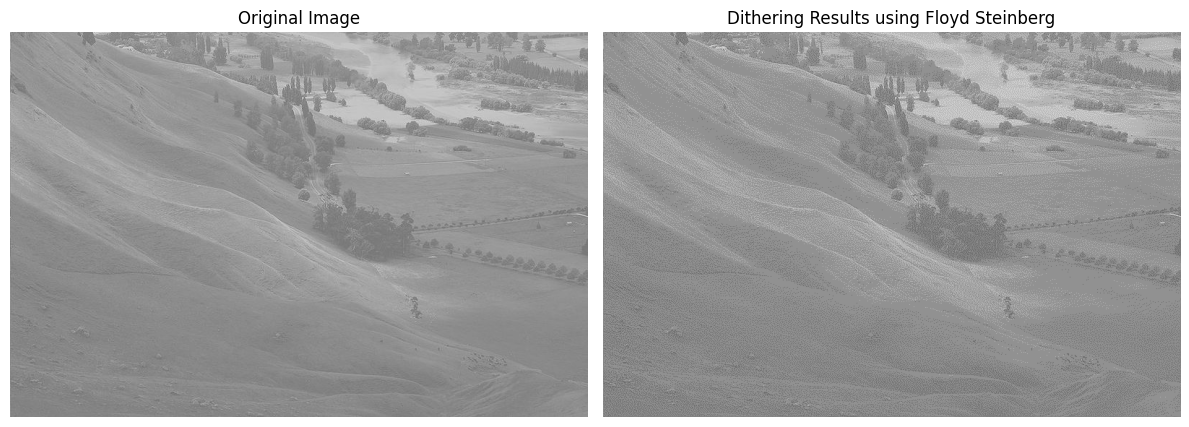

✓ Floyd-Steinberg dithering completed successfully



In [32]:
IMAGE_PATHS = {

    'wiki': '/content/drive/MyDrive/PCVK/Images/wiki.jpg'

}
def floyd_steinberg_dithering(image, levels=8):
    """Implement Floyd-Steinberg dithering"""
    if len(image.shape) == 3:
        # Work with color image
        result = image.astype(np.float32).copy()
        height, width, channels = image.shape
    else:
        # Work with grayscale image
        result = image.astype(np.float32).copy()
        height, width = image.shape
        channels = 1

    # Calculate quantization step
    step = 255.0 / (levels - 1)

    def threshold(value):
        """Threshold function to keep values in [0, 255] range"""
        return np.clip(value, 0, 255)

    if channels == 3:
        # Color image processing
        for y in range(height - 1):  # height - 1 to avoid boundary issues
            for x in range(1, width - 1):  # 1 to width-1 to avoid boundary issues
                for c in range(channels):  # Process each color channel
                    # Get old pixel value
                    old_pixel = result[y, x, c]

                    # Quantize pixel
                    new_pixel = np.round(old_pixel / step) * step
                    result[y, x, c] = new_pixel

                    # Calculate quantization error
                    error = old_pixel - new_pixel

                    # Distribute error using Floyd-Steinberg coefficients
                    # R1: (x+1, y) gets 7/16 of error
                    if x + 1 < width:
                        result[y, x + 1, c] = threshold(result[y, x + 1, c] + error * 7/16)

                    # R2: (x+1, y+1) gets 1/16 of error
                    if x + 1 < width and y + 1 < height:
                        result[y + 1, x + 1, c] = threshold(result[y + 1, x + 1, c] + error * 1/16)

                    # R3: (x, y+1) gets 5/16 of error
                    if y + 1 < height:
                        result[y + 1, x, c] = threshold(result[y + 1, x, c] + error * 5/16)

                    # R4: (x-1, y+1) gets 3/16 of error
                    if x - 1 >= 0 and y + 1 < height:
                        result[y + 1, x - 1, c] = threshold(result[y + 1, x - 1, c] + error * 3/16)
    else:
        # Grayscale image processing
        for y in range(height - 1):
            for x in range(1, width - 1):
                # Get old pixel value
                old_pixel = result[y, x]

                # Quantize pixel
                new_pixel = np.round(old_pixel / step) * step
                result[y, x] = new_pixel

                # Calculate quantization error
                error = old_pixel - new_pixel

                # Distribute error using Floyd-Steinberg coefficients
                if x + 1 < width:
                    result[y, x + 1] = threshold(result[y, x + 1] + error * 7/16)

                if x + 1 < width and y + 1 < height:
                    result[y + 1, x + 1] = threshold(result[y + 1, x + 1] + error * 1/16)

                if y + 1 < height:
                    result[y + 1, x] = threshold(result[y + 1, x] + error * 5/16)

                if x - 1 >= 0 and y + 1 < height:
                    result[y + 1, x - 1] = threshold(result[y + 1, x - 1] + error * 3/16)

    return result.astype(np.uint8)

def plot_dithering_results(original, dithered):
    """Plot Floyd-Steinberg dithering results"""
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    if len(original.shape) == 3:
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if len(dithered.shape) == 3:
        plt.imshow(cv2.cvtColor(dithered, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(dithered, cmap='gray')
    plt.title('Dithering Results using Floyd Steinberg')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Load and process wiki.jpg from Google Drive
wiki_img = cv2.imread(IMAGE_PATHS['wiki'])
if wiki_img is not None:
    dithered_image = floyd_steinberg_dithering(wiki_img, levels=8)
    plot_dithering_results(wiki_img, dithered_image)
    print("✓ Floyd-Steinberg dithering completed successfully")
else:
    print("✗ Could not load wiki.jpg from Google Drive path")
    print(f"  Path tried: {IMAGE_PATHS['wiki']}")
    print("  Please ensure the file exists and Google Drive is mounted")

print()